This notebook contains all of the models used and outputs a figure containing the performance and confidence intervals of each model type. While the raw data files are not provided, all further processing steps are shown here. If you would like to view the raw data files, please reach out to us, and we will try our best to assist. 

# Imports and File Paths

In [1]:
from itertools import repeat
import csv
import os
import pandas as pd
import numpy as np
import scipy


from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

from keras.models import Sequential
from keras.models import load_model
from keras.models import Model

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

from keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau,CSVLogger
from keras.utils import plot_model
from keras import backend as K


from keras import layers
from keras.layers.normalization import BatchNormalization
from keras.layers.embeddings import Embedding
from keras.layers.core import SpatialDropout1D
from keras.layers.core import Dense
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation
from keras.layers import LSTM, Bidirectional ,GRU,Conv1D, Flatten, MaxPooling1D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense
from keras.layers import GRU, Dense, Bidirectional, Embedding, Dropout, TimeDistributed
from keras.layers import Input
from keras.layers import concatenate

K.set_image_dim_ordering('tf')

#from pyimagesearch import datasets
#from pyimagesearch import models

import argparse
import locale


#Used for convolutional neural network (CNN)
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from keras.layers.convolutional import Conv1D, MaxPooling1D


import sys
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline


# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
np.set_printoptions(threshold=np.inf)


from pandas import read_csv, DataFrame
from collections import defaultdict


#From classifier models import
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

#Load scikit's support vector machine (SVM) library
from sklearn.svm import SVC

#Load scikit's Lasso model used as part of the logistic lasso model
from sklearn.linear_model import Lasso

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers.normalization import BatchNormalization
from keras.layers.embeddings import Embedding
from keras.layers.core import SpatialDropout1D
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM, Bidirectional ,GRU,Conv1D, Flatten, MaxPooling1D
from keras import layers
from keras.layers import GRU, Dense, Bidirectional, Embedding, Dropout, TimeDistributed

from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau,CSVLogger
from keras.models import load_model
from keras.utils import plot_model
from keras import backend as K

import matplotlib.pyplot as plt
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
np.set_printoptions(threshold=np.inf)

Using TensorFlow backend.


# Basic Models

In [3]:
#The first 698 columns are features used to train the basic models 
X_basic = df_basic.iloc[:,0:698]
#A column called label has Renal Replacement Therapy Free Survival (RRTFS) Outcomes in the 'label' column
Y_basic = df_basic.label

,age_year,duration_1,vent_1,x_temp,sd_temp,x_hr,sd_hr,x_asbp,sd_asbp,x_adbp,sd_adbp,x_amap,sd_amap,x_sbp,sd_sbp,x_dbp,sd_dbp,x_map,sd_map,x_rr,sd_rr,x_gcs,sd_gcs,x_sodium,sd_sodium,x_potassium,sd_potassium,x_chloride,sd_chloride,x_bicarb,sd_bicarb,x_calcium,sd_calcium,x_phosphate,sd_phosphate,x_magnesium,sd_magnesium,x_creatinine,sd_creatinine,x_bun,sd_bun,x_glucose,sd_glucose,x_albumin,sd_albumin,x_globulin,sd_globulin,x_ast,sd_ast,x_alt,sd_alt,x_alp,sd_alp,x_ggt,sd_ggt,x_directb,sd_directb,x_indirectb,sd_indirectb,x_totalb,sd_totalb,x_hct,sd_hct,x_hb,sd_hb,x_wbc,sd_wbc,x_plt,sd_plt,x_pt,sd_pt,x_ptt,sd_ptt,x_inr,sd_inr,x_ddimer,sd_ddimer,x_ph,sd_ph,x_po2,sd_po2,x_pco2,sd_pco2,x_lactate,sd_lactate,x_spo2,sd_spo2,x_aagradient,sd_aagradient,x_fio2,sd_fio2,x_svo2,sd_svo2,x_scvo2,sd_scvo2,htinch,valuenum,rate_dopamine,rate_dobutamine,rate_norepinephrine,rate_epinephrine,rate_phenylephrine,rate_vasopressin,rate_milrinone,x_urinecal,sd_urinecal,congestive_heart_failure,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,chronic_pulmonary,diabetes_uncomplicated,diabetes_complicated,hypothyroidism,renal_failure,liver_disease,peptic_ulcer,aids,lymphoma,metastatic_cancer,solid_tumor,rheumatoid_arthritis,coagulopathy,obesity,weight_loss,fluid_electrolytes,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression,duration_loop,meandose_loop,label_AMOXicillin,label_AMPicillin,label_Abacavir Sulfate,label_Acetaminophen,label_Acetazolamide,label_Acetylcysteine,label_Acyclovir,label_Adefovir Dipivoxil,label_Adenosine,label_Albumin,label_Albuterol,label_Albuterol Sulfate-Ipratropium,label_Alcohol,label_Aldesleukin,label_Alemtuzumab,label_Alendronate Sodium,label_Allopurinol,label_Alprazolam,label_Alteplase,label_Aluminum Hydroxide,label_Amantadine,label_Ambisome,label_Amikacin,label_Amiloride HCl,label_Aminocaproic Acid,label_Amiodarone,label_Amitriptyline,label_Amlodipine,label_Amoxicillin Trihydrate,label_Amoxicillin-Clavulanic Acid,label_Ampicillin,label_Ampicillin-Sulbactam,label_Amrinone,label_Amylase/Lipase/Protease,label_Anti-Thymocyte Globulin (Rabbit),label_Anusol,label_Aprotinin,label_Aquaphor Ointment,label_Argatroban,label_Artificial Tears,label_Ascorbic Acid,label_Aspirin,label_Aspirin-Caffeine-Butalbital,label_Atazanavir,label_Atenolol,label_Atorvastatin,label_Atovaquone,label_Atropine,label_Aveeno Colloidal,label_Azathioprine,label_Azithromycin,label_Aztreonam,label_Bacitracin,label_Bacitracin/Polymyxin B Sulfate Opht. Oint,label_Baclofen,label_Bactrim (SMX/TMP),label_Barocet,label_Basiliximab,label_Beclomethasone Dipropionate,label_Benefiber,label_Bengay,label_Benzocaine 20% Spray,label_Benzonatate,label_Benztropine Mesylate,label_Betamethasone Dipro 0.05% Cream,label_Bethanechol,label_Bicitra,label_Bisacodyl,label_Bisoprolol Fumarate,label_Bivalirudin,label_Blistex Lip Ointment,label_Bortezomib,label_Brimonidine Tartrate 0.15% Ophth.,label_BuPROPion,label_Budesonide,label_Bumetanide,label_Bupivacaine 0.1%,label_Busulfan,label_Calcitriol,label_Calcium Acetate,label_Caphosol,label_Captopril,label_Carafate (Sucralfate),label_Carbamazepine,label_Carbidopa-Levodopa (25-100),label_Carmustine,label_Carvedilol,label_Caspofungin,label_Cefazolin,label_Cefepime,label_Cefotaxime,label_Cefotetan,label_Cefpodoxime Proxetil,label_Ceftazidime,label_Ceftriaxone,label_Cephalexin,label_Cetylpyridinium Chl (Cepacol),label_Chloraseptic Throat Spray,label_Chlorhexidine Gluconate,label_Chloroprocaine 2%,label_Chlorothiazide,label_Chlorpromazine HCl,label_Chlorthalidone,label_Cholestyramine,label_Cidofovir,label_Cilostazol,label_Cimetidine,label_Cinacalcet,label_Ciprofloxacin,label_Cisatracurium,label_Cisplatin,label_Citalopram,label_Citrate,label_Clarithromycin,label_Clindamycin,label_Clobetasol Propionate 0.05% Cream,label_Clofarabine,label_Clofarabine,label_Clonazepam,label_Clonidine HCl,label_Clopidogrel,label_Clotrimazole,label_Codeine,label_Coenzyme Q10,label_Colchicine,l

In [4]:
#Split data into training (80%) and test (20%) sets 
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(X_basic, Y_basic,test_size=0.2, random_state=0)

In [5]:
#Since input features are at different scales we need to standardize the input
#Scaling according to this source: https://www.datacamp.com/community/tutorials/deep-learning-python
sc = StandardScaler().fit(X_train_basic)

# Scale the train set
X_train_basic = sc.transform(X_train_basic)

# Scale the test set
X_test_basic = sc.transform(X_test_basic)

C:\Users\Suraj\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\Suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


# Logistic Regression Model

In [6]:
#Fitting logistic regression model on data 
logreg = LogisticRegression()
logreg.fit(X_train_basic, y_train_basic)

C:\Users\Suraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
# Make predictions
preds_log = logreg.predict(X_test_basic)

In [8]:
#Call sklearn's roc_curve() function to generate the false positive rate (fpr) and true positive rate (tpr)
fpr_log, tpr_log, thresholds_log = roc_curve(y_test_basic, preds_log)
#Get area under curve (auc)
auc_log = auc(fpr_log, tpr_log)
print('Logistic Regression (LR) AUROC: ' ,auc_log)

Logistic Regression (LR) AUROC:  0.5893382352941177


# Random Forest Model 

In [9]:
# Create a random forest Classifier. 'rf' means random forest
rf=RandomForestClassifier(n_estimators=15,random_state=42, max_depth=12)

# Train the Classifier to take the training features
rf.fit(X_train_basic,y_train_basic)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [10]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
preds_rf = rf.predict(X_test_basic)

In [11]:
#Call sklearn's roc_curve() function to generate the false positive rate (fpr) and true positive rate (tpr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_basic, preds_rf)
#Get area under curve (auc)
auc_rf = auc(fpr_rf, tpr_rf)
print('Random Forest (RF) AUROC: ' ,auc_rf)

Random Forest (RF) AUROC:  0.6033088235294117


# Support Vector Machine (SVM)

In [12]:
#This article is useful for understanding the model and the various hyperparameters involved
#https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72
svm = SVC(kernel='linear',random_state=42,C=0.1)
#Fit data to SVM model
svm.fit(X_train_basic,y_train_basic)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
# Apply the Classifier we trained to the test data
preds_svm = svm.predict(X_test_basic)

In [14]:
#Call sklearn's roc_curve() function to generate the false positive rate (fpr) and true positive rate (tpr)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_basic, preds_svm)
#Get area under curve (auc)
auc_svm = auc(fpr_svm, tpr_svm)
print('Support Vector Machine (SVM) AUROC: ' ,auc_svm)

Support Vector Machine (SVM) AUROC:  0.5808823529411764


# Lasso Regression Model

In [15]:
#Fitting logistic regression model on data with lasso using l1 penalty
log_lasso = LogisticRegression(penalty='l1', C=0.1)
log_lasso.fit(X_train_basic, y_train_basic)

C:\Users\Suraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
# Apply the Classifier we trained to the test data
preds_lasso = log_lasso.predict(X_test_basic)

In [17]:
#Call sklearn's roc_curve() function to generate the false positive rate (fpr) and true positive rate (tpr)
fpr_lasso, tpr_lasso, thresholds_lasso = roc_curve(y_test_basic, preds_lasso)
#Get area under curve (auc)
auc_lasso = auc(fpr_lasso, tpr_lasso)
print('Logistic Lasso (LASSO) AUROC: ' ,auc_lasso)

Logistic Lasso (LASSO) AUROC:  0.6033088235294117


# Ensemble Model

In [ ]:
#Import pre-processed file 
#df_time was a csv file containing the labs and vitals for each patient in chronological order
df_time = pd.read_csv(r'df_flat.csv', low_memory =False)
#Allows all columns of the table to be visible
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_seq_items = 2000
#Show dimensions of df 
print(df_time.shape)
#Shows first 20 rows of table 
df_time.head(20)

In [ ]:
#Import pre-processed file 
#df_cat contains all of the categorical features for each patient (demographics, height and weight measurements, etc.)
#Allows all columns of the table to be visible
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Show dimensions of df 
print(df_cat.shape)
#Shows first 2 rows of table 

In [ ]:
#There were additional columns which needed to be dropped from the df_cat dataframe
df_cat = df_cat.drop(['x_temp','sd_temp',
 'x_hr','sd_hr',
 'x_asbp','sd_asbp',
 'x_adbp','sd_adbp',
 'x_amap','sd_amap',
 'x_sbp','sd_sbp',
 'x_dbp','sd_dbp',
 'x_map','sd_map',
 'x_rr','sd_rr',
 'x_gcs','sd_gcs',
 'x_sodium','sd_sodium',
 'x_potassium','sd_potassium',
 'x_chloride', 'sd_chloride',
 'x_bicarb','sd_bicarb',
 'x_calcium','sd_calcium',
 'x_phosphate','sd_phosphate',
 'x_magnesium','sd_magnesium',
 'x_creatinine','sd_creatinine',
 'x_bun','sd_bun',
 'x_glucose','sd_glucose',
 'x_albumin','sd_albumin',
 'x_globulin','sd_globulin',
 'x_ast','sd_ast',
 'x_alt','sd_alt',
 'x_alp','sd_alp',
 'x_ggt','sd_ggt',
 'x_directb','sd_directb',
 'x_indirectb','sd_indirectb',
 'x_totalb','sd_totalb',
 'x_hct','sd_hct',
 'x_hb','sd_hb',
 'x_wbc','sd_wbc',
 'x_plt','sd_plt',
 'x_pt','sd_pt',
 'x_ptt','sd_ptt',
 'x_inr','sd_inr',
 'x_ddimer','sd_ddimer',
 'x_ph','sd_ph',
 'x_po2','sd_po2',
 'x_pco2','sd_pco2',
 'x_lactate','sd_lactate',
 'x_spo2','sd_spo2',
 'x_aagradient','sd_aagradient',
 'x_fio2','sd_fio2',
 'x_svo2','sd_svo2',
 'x_scvo2','sd_scvo2'], axis=1)
print(df_cat.shape)
df_cat.head(10)

In [ ]:
#Both the categorical and time-dependent features were merged based on the patient's id
df = pd.merge(df_time, df_cat, on=['subject_id'])
print(df.shape)
df.head(20)

In [ ]:
#A redundant column was made which is removed 
df = df.drop(['label_x'],axis=1)
print(df.shape)
df.head(2)

In [ ]:
#Data was split so X contains the features used to train the model, and Y contains the final outcome (RRTFS), a.k.a. label
X = df.iloc[:,1:14458]
Y = df.label_y

In [ ]:
#All unique strings for all columns are mapped to unique integers through a LabelEncoder object
le = LabelEncoder()

#Apply label encoder function to columns that have 'value' in their name 
m = X.columns.str.contains('value')
X.loc[:, m] = X.loc[:, m].apply(le.fit_transform)

In [ ]:
#Split dataset so that 80% is used for training and 20% is used for testing
#Split based on this code: https://realpython.com/python-keras-text-classification/.values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [ ]:
#The following multi-input model is based on the following source
#Source: https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/

# Method to build dense model to handle categorical data 
def build_dense(dim, regress = False):
    # create model
    model = Sequential()
    #First hidden layer has 350 nodes, relu activation is standard
    model.add(Dense(350, input_dim=dim, kernel_initializer='normal', activation='relu'))
  
    #Second hidden layer has 175 nodes
    model.add(Dense(175, kernel_initializer='normal', activation='relu'))

    #Third hidden layer has 75 nodes
    model.add(Dense(75, kernel_initializer='normal', activation='relu'))

    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
        
    plot_model(model, to_file='dense_plot.png', show_shapes=True, show_layer_names=True)
    
    model.summary()
    return model

In [ ]:
# Working model for lstm or time-dependent data
def build_lstm(dim, regress = False):
    #Used for embedding layer 
    embedding_dim = 150

    # create model
    model = Sequential()
    
    #First hidden layer is embedding layer 
    #input_dim: the size of the vocabulary
    #output_dim: the size of the dense vector
    #input_length: the length of the sequence, maximum number of lab values 
    model.add(layers.Embedding(input_dim=dim,output_dim=embedding_dim,input_length=13851))
    
    #Second hidden layer is LSTM
    model.add(LSTM(100))
    
    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    plot_model(model, to_file='LSTM_model_plot.png', show_shapes=True, show_layer_names=True)
    model.summary()

    return model

In [ ]:
# create the Dense and LSTM models and provide input dimensions
dense = build_dense(606, regress=False)
lstm = build_lstm(1000000, regress=False)

In [ ]:
# create the input to our final set of layers as the *output* of both
# the MLP and CNN
combinedInput = concatenate([dense.output, lstm.output])

In [ ]:
#the final FC layer head has two dense layers, the final one being the regression head
x = Dense(4, activation="relu")(combinedInput)
x = Dense(1, activation='sigmoid')(x)
 
# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model = Model(inputs=[dense.input, lstm.input], outputs=x)

In [ ]:
# compile the model 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Splitting data for both sub-models
X_train_lstm = X_train.iloc[:,0:13851]

In [ ]:
X_test_lstm = X_test.iloc[:,0:13851]

In [ ]:
X_train_dense = X_train.iloc[:,13851:14458]

In [ ]:
X_test_dense = X_test.iloc[:,13851:14458]

In [ ]:
#Fitting the data to the training dataset
model.fit([X_train_dense,X_train_lstm],Y_train, batch_size=32, epochs=500,verbose=0)

In [ ]:
#evaluate the loss value & metrics values for the model in test mode 
eval_model=model.evaluate([X_train_dense,X_train_lstm], Y_train, verbose=0)
eval_model

In [ ]:
#Predict output of test dataset
Y_pred=model.predict([X_test_dense,X_test_lstm],verbose=0)
#Y_pred =(Y_pred>0.5)

#Call sklearn's roc_curve() function to generate the false positive rate (fpr) and true positive rate (tpr)
fpr_LSTM, tpr_LSTM, thresholds_LSTM = roc_curve(Y_test, Y_pred)
#Get area under curve (auc)
auc_LSTM = auc(fpr_LSTM, tpr_LSTM)
print('Ensemble AUROC: ' ,auc_LSTM)

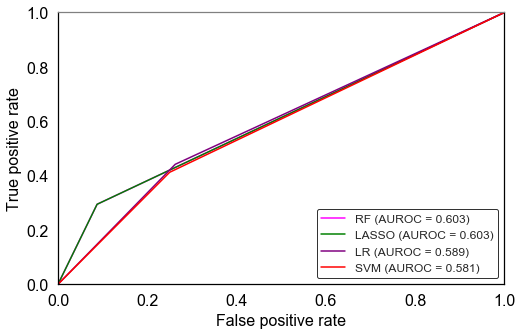

In [28]:
#This cell plots the receiver operating characteristic (ROC)
#Source: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from matplotlib.ticker import MultipleLocator
fig, ax = plt.subplots(figsize=(8,5))
ax.yaxis.grid(which="major", color='gray', linestyle='-', linewidth=1.5)
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('gray') 
ax.tick_params(axis='x', colors='black', labelsize=16)
ax.tick_params(axis='y', colors='black', labelsize=16)

ax.xaxis.grid(which="major", linewidth=0)
ax.yaxis.grid(which="major", linewidth=0)


#Data for Ensemble model
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_LSTM, tpr_LSTM, label='ENSEMBLE (AUROC = {:.3f})'.format(auc_LSTM))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate', color = 'black', fontsize=16)
plt.ylabel('True positive rate', color = 'black',fontsize=16)
plt.title('Figure 1: Receiver operating characteristic (ROC) of Models')

#Data for random forest classifier
plt.plot(fpr_rf, tpr_rf, label='RF (AUROC = {:.3f})'.format(auc_rf), color ='magenta')

#Data for lasso logistic model
plt.plot(fpr_lasso, tpr_lasso, label='LASSO (AUROC = {:.3f})'.format(auc_lasso), color = 'green')

#Data for logistic regression
plt.plot(fpr_log, tpr_log, label='LR (AUROC = {:.3f})'.format(auc_log), color='purple')

#Data for support vector machine (SVM)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUROC = {:.3f})'.format(auc_svm), color='red')

plt.legend(loc='lower right',fontsize=12, edgecolor= 'black')


plt.savefig('All_Models_Output.png', format = 'png', transparent=True)

# Confidence Intervals

In [ ]:
#Generate confidence interval through bootstrapping method
#Ensemble Confidence Interval
y_pred = Y_pred
y_true = Y_test.values

print("Original Ensemble AUROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred) - 1, len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)

In [ ]:
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

#Get 95% confidence interval
confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
print("95% Confidence interval for Ensemble Model: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

In [29]:
#Logistic Regression (LR) Confidence Interval
y_pred_log = preds_log
y_true_log = y_test_basic.values

print("Original Logistic Regression (LR) AUROC area: {:0.3f}".format(roc_auc_score(y_true_log, y_pred_log)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred_log) - 1, len(y_pred_log))
    if len(np.unique(y_true_log[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true_log[indices], y_pred_log[indices])
    bootstrapped_scores.append(score)

Original Logistic Regression (LR) AUROC area: 0.589


In [30]:
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

#Get 95% confidence interval
confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
print("95% Confidence interval for Logistic Regression Model: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

95% Confidence interval for Logistic Regression Model: [0.487 - 0.679]


In [31]:
#Support Vector Machine (SVM) Confidence Interval
y_pred_svm = preds_svm
y_true_svm = y_test_basic.values

print("Original SVM AUROC area: {:0.3f}".format(roc_auc_score(y_true_svm, y_pred_svm)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred_svm) - 1, len(y_pred_svm))
    if len(np.unique(y_true_svm[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true_svm[indices], y_pred_svm[indices])
    bootstrapped_scores.append(score)

Original SVM AUROC area: 0.581


In [32]:
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

#Get 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
print("95% Confidence interval for SVM: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

95% Confidence interval for SVM: [0.492 - 0.684]


In [33]:
#Logistic Lasso (LASSO) Confidence Interval
y_pred_lasso = preds_lasso
y_true_lasso = y_test_basic.values

print("Original LASSO AUROC area: {:0.3f}".format(roc_auc_score(y_true_lasso, y_pred_lasso)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred_lasso) - 1, len(y_pred_lasso))
    if len(np.unique(y_true_lasso[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true_lasso[indices], y_pred_lasso[indices])
    bootstrapped_scores.append(score)

Original LASSO AUROC area: 0.603


In [34]:
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

#Get 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
print("95% Confidence interval for LASSO: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

95% Confidence interval for LASSO: [0.512 - 0.677]


In [35]:
#Random Forest (RF) Confidence Interval
y_pred_rf = preds_rf
y_true_rf = y_test_basic.values

print("Original RF AUROC area: {:0.3f}".format(roc_auc_score(y_true_rf, y_pred_rf)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred_rf) - 1, len(y_pred_rf))
    if len(np.unique(y_true_rf[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true_rf[indices], y_pred_rf[indices])
    bootstrapped_scores.append(score)

Original RF AUROC area: 0.603


In [36]:
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

#Get 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
print("95% Confidence interval for RF: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

95% Confidence interval for RF: [0.522 - 0.702]
